In [2]:
pip install kagglehub


In [2]:
!pip install seaborn


In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [25]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

Load the dataset


In [26]:

file_path = "augustana_event_attendance.xlsx"

df = pd.read_excel(file_path)

df.head()


,event_id,event_name,event_type,event_category,host_org,location,promotion_method,weather,free_food,giveaways,event_day,event_time,month,is_weekend,actual_attendance
0,1,Community Meeting,Educational,Learning,Campus Ministry,Froiland Basement,Social Media,Snowy,No,No,Sat,15,12,0,54
1,2,Coding Workshop,Social,Competition,International Programs,Solberg Lounge,Posters,Rainy,Yes,No,Sat,22,10,0,92
2,3,Career Fair Prep,Community,Food,Biology Club,Madsen Center,Club Announcement,Sunny,No,No,Tue,19,8,0,36
3,4,Board Game Bash,Wellness,Entertainment,Viking Advisors,Madsen Center,Club Announcement,Snowy,No,No,Sun,19,1,1,35
4,5,Cultural Night,Educational,Networking,Biology Club,Elmen Center,Posters,Rainy,No,No,Mon,13,8,0,31


Verify the datatypes

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           500 non-null    int64 
 1   event_name         500 non-null    object
 2   event_type         500 non-null    object
 3   event_category     500 non-null    object
 4   host_org           500 non-null    object
 5   location           500 non-null    object
 6   promotion_method   500 non-null    object
 7   weather            500 non-null    object
 8   free_food          500 non-null    object
 9   giveaways          500 non-null    object
 10  event_day          500 non-null    object
 11  event_time         500 non-null    int64 
 12  month              500 non-null    int64 
 13  is_weekend         500 non-null    int64 
 14  actual_attendance  500 non-null    int64 
dtypes: int64(5), object(10)
memory usage: 58.7+ KB


In [28]:
df.describe(include="all")


,event_id,event_name,event_type,event_category,host_org,location,promotion_method,weather,free_food,giveaways,event_day,event_time,month,is_weekend,actual_attendance
count,500.000000,500,500,500,500,500,500,500,500,500,500,500.000000,500.000000,500.000000,500.000000
unique,NaN,15,5,5,6,9,5,4,2,2,7,NaN,NaN,NaN,NaN
top,NaN,Trivia Night,Community,Learning,Biology Club,Madsen Center,Dorm Rounds,Sunny,Yes,No,Sun,NaN,NaN,NaN,NaN
freq,NaN,44,114,108,86,65,114,147,315,383,83,NaN,NaN,NaN,NaN
mean,250.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.232000,6.838000,0.300000,58.020000
std,144.481833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.757981,3.440266,0.458717,27.554202
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,1.000000,0.000000,5.000000
25%,125.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,4.000000,0.000000,37.000000
50%,250.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,7.000000,0.000000,56.000000
75%,375.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,10.000000,1.000000,76.250000


Check the target distrubution on a histogram

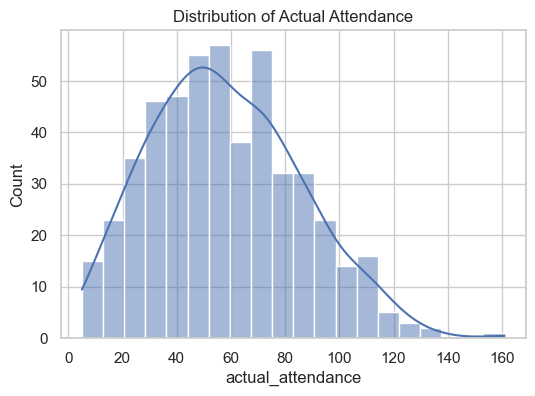

In [29]:
# Check target distribution
plt.figure(figsize=(6,4))
sns.histplot(df["actual_attendance"], bins=20, kde=True)
plt.title("Distribution of Actual Attendance")
plt.xlabel("actual_attendance")
plt.ylabel("Count")
plt.show()


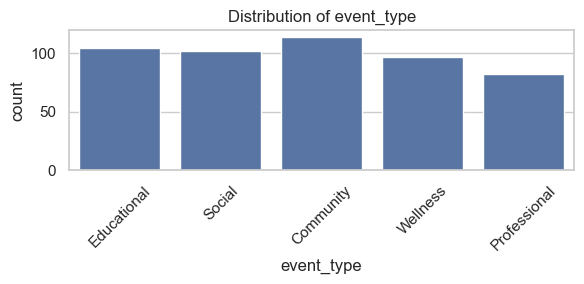

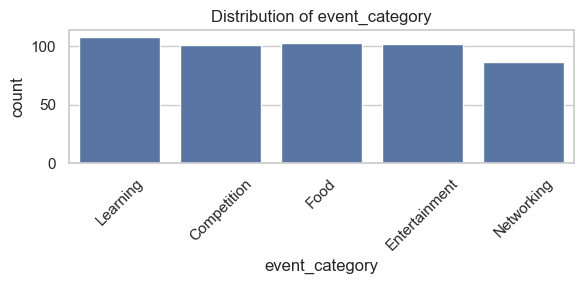

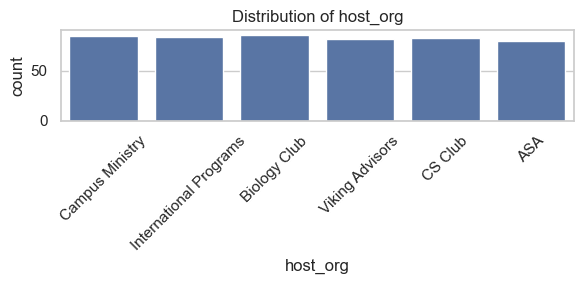

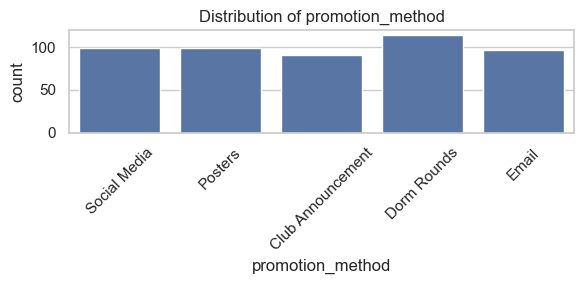

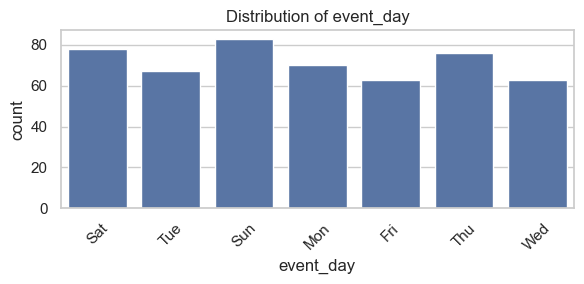

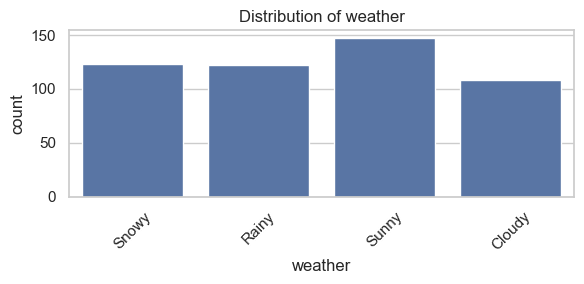

In [30]:
# Quick look at some categorical feature distributions
for col in ["event_type", "event_category", "host_org", "promotion_method", "event_day", "weather"]:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Define features and target and Train/Test Split

In [31]:
target_col = "actual_attendance"

# Columns we won't use as features
drop_cols = ["event_id"]  # ID only

feature_cols = [c for c in df.columns if c not in drop_cols + [target_col]]

X = df[feature_cols].copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.head()


,event_name,event_type,event_category,host_org,location,promotion_method,weather,free_food,giveaways,event_day,event_time,month,is_weekend
249,STEM Mixer,Wellness,Food,ASA,Elmen Center,Dorm Rounds,Snowy,Yes,No,Fri,10,7,0
433,Resume Workshop,Educational,Food,Biology Club,Madsen Center,Posters,Sunny,No,No,Tue,18,10,1
19,Study Jam,Educational,Learning,Biology Club,Johnsons Hall,Posters,Snowy,Yes,No,Sat,14,9,0
322,Coding Workshop,Community,Food,Campus Ministry,Johnsons Hall,Dorm Rounds,Cloudy,Yes,Yes,Thu,21,12,0
332,Game Night,Professional,Networking,Campus Ministry,Johnsons Hall,Social Media,Snowy,Yes,No,Sat,20,7,0


Preprocessing Pipeline
WE'll treat:
- Numeric features: event_time, month, is_weekend
- Catgorical Features: all the other elements.

In [32]:
numeric_features = ["event_time", "month", "is_weekend"]

categorical_features = [
    "event_name",
    "event_type",
    "event_category",
    "host_org",
    "location",
    "promotion_method",
    "weather",
    "free_food",
    "giveaways",
    "event_day"
]

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


Helper Model Evaluation Function

In [34]:
def evaluate_regression_model(name, model):
    """
    Fits model inside a preprocessing pipeline and prints metrics.
    Returns the fitted pipeline and predictions.
    """
    print(f"\n==================== {name} ====================")
    
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"MAE:  {mae:.3f}")
    print(f"MSE:  {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}")

    return pipe, preds, {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


Dummy Metrics

In [35]:
metrics_summary = {}

dummy_model, dummy_preds, dummy_metrics = evaluate_regression_model(
    "Dummy Regressor (Predicts Mean)",
    DummyRegressor(strategy="mean")
)

metrics_summary["Dummy"] = dummy_metrics



==================== Dummy Regressor (Predicts Mean) ====================
MAE:  23.691
MSE:  819.329
RMSE: 28.624
R²:   -0.000


Linear Regression

In [36]:
lin_model, lin_preds, lin_metrics = evaluate_regression_model(
    "Linear Regression",
    LinearRegression()
)

metrics_summary["Linear Regression"] = lin_metrics



==================== Linear Regression ====================
MAE:  13.727
MSE:  293.657
RMSE: 17.136
R²:   0.642


Decision Tree Regressor

In [37]:
dt_model, dt_preds, dt_metrics = evaluate_regression_model(
    "Decision Tree Regressor",
    DecisionTreeRegressor(
        random_state=42,
        max_depth=8,
        min_samples_split=20,
        min_samples_leaf=5
    )
)

metrics_summary["Decision Tree"] = dt_metrics



==================== Decision Tree Regressor ====================
MAE:  13.839
MSE:  294.153
RMSE: 17.151
R²:   0.641


Random Forest Regressor

In [38]:
rf_model, rf_preds, rf_metrics = evaluate_regression_model(
    "Random Forest Regressor",
    RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        n_jobs=-1
    )
)

metrics_summary["Random Forest"] = rf_metrics



==================== Random Forest Regressor ====================
MAE:  13.172
MSE:  279.687
RMSE: 16.724
R²:   0.659


Neural network Regression using Keras

In [39]:
# Fit preprocess on training data only
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc = preprocess.transform(X_test)

# Train/validation split within training set
from sklearn.model_selection import train_test_split

X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_proc,
    y_train.values,
    test_size=0.2,
    random_state=42
)

X_train_proc.shape, X_train_nn.shape, X_val_nn.shape


((400, 63), (320, 63), (80, 63))

Build and Train Neural Network

In [40]:
input_dim = X_train_proc.shape[1]

nn_model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # regression output
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = nn_model.fit(
    X_train_nn,
    y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
10/10 [==============================] - 3s 42ms/step - loss: 4035.4133 - mae: 56.9497 - val_loss: 4237.3530 - val_mae: 61.0386
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 3922.2278 - mae: 56.2076 - val_loss: 4216.7578 - val_mae: 60.8868
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 3815.2310 - mae: 55.4490 - val_loss: 4192.0186 - val_mae: 60.7039
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 3693.6284 - mae: 54.6007 - val_loss: 4161.2061 - val_mae: 60.4798
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 3567.0591 - mae: 53.7282 - val_loss: 4121.8374 - val_mae: 60.1989
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 3405.7722 - mae: 52.6510 - val_loss: 4068.5820 - val_mae: 59.8249
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 3228.2173 - mae: 51.3929 - val_loss: 3995.0332 - val_mae: 59.3181
Epoch 8/50
10/10 [===============

Plot Training Curves

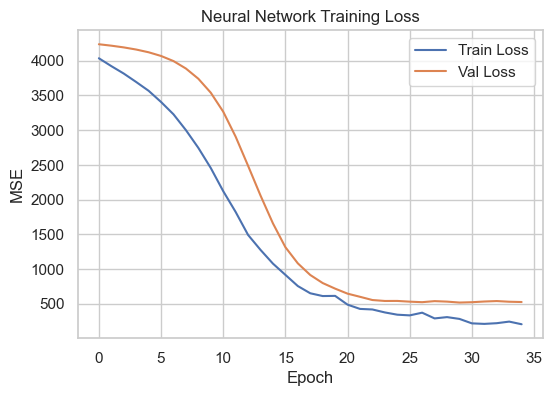

In [41]:
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Neural Network Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()


Evaluate NN on Test Set

In [42]:
nn_preds = nn_model.predict(X_test_proc).flatten()

nn_mae = mean_absolute_error(y_test, nn_preds)
nn_mse = mean_squared_error(y_test, nn_preds)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_test, nn_preds)

print("\n================ Neural Network Regression ==================")
print(f"MAE:  {nn_mae:.3f}")
print(f"MSE:  {nn_mse:.3f}")
print(f"RMSE: {nn_rmse:.3f}")
print(f"R²:   {nn_r2:.3f}")

metrics_summary["Neural Network"] = {
    "MAE": nn_mae,
    "MSE": nn_mse,
    "RMSE": nn_rmse,
    "R2": nn_r2
}


4/4 [==============================] - 0s 8ms/step

================ Neural Network Regression ==================
MAE:  20.553
MSE:  657.886
RMSE: 25.649
R²:   0.197


Model Comparison Table

In [43]:
metrics_df = pd.DataFrame(metrics_summary).T
metrics_df


,MAE,MSE,RMSE,R2
Dummy,23.690500,819.328906,28.623922,-0.000002
Linear Regression,13.726956,293.657105,17.136426,0.641588
Decision Tree,13.839469,294.153034,17.150890,0.640982
Random Forest,13.172482,279.687154,16.723850,0.658638
Neural Network,20.552628,657.886251,25.649293,0.197041


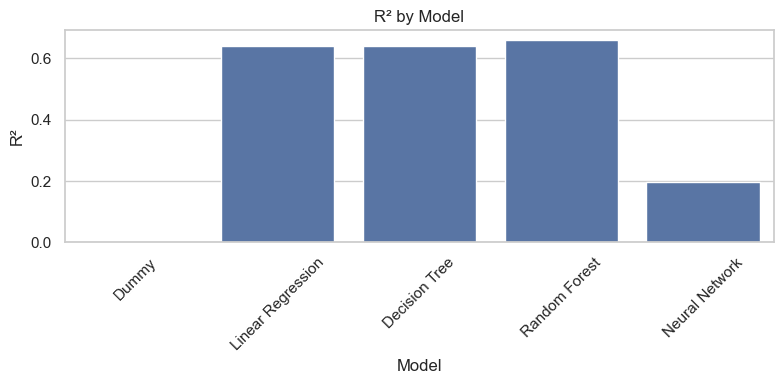

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(data=metrics_df.reset_index(), x="index", y="R2")
plt.title("R² by Model")
plt.xlabel("Model")
plt.ylabel("R²")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now, we use what we have cretaed to predict the Attendance for a sample Computer Science club event using the best performing model

In [46]:
def predict_attendance(event_dict, model=rf_model):
    """
    event_dict: a Python dict with feature names as keys.
    Example:
    {
        "event_name": "Smash Bros Tournament",
        "event_type": "Social",
        "event_category": "Competition",
        "host_org": "CS Club",
        "location": "Solberg Lounge",
        "promotion_method": "Social Media",
        "weather": "Sunny",
        "free_food": "Yes",
        "giveaways": "Yes",
        "event_day": "Fri",
        "event_time": 17,
        "month": 3,
        "is_weekend": 1
    }
    """
    input_df = pd.DataFrame([event_dict])
    pred = model.predict(input_df)[0]
    return round(pred)

example_event = {
    "event_name": "Smash Bros Tournament",
    "event_type": "Social",
    "event_category": "Competition",
    "host_org": "CS Club",
    "location": "Solberg Lounge",
    "promotion_method": "Social Media",
    "weather": "Sunny",
    "free_food": "Yes",
    "giveaways": "Yes",
    "event_day": "Fri",
    "event_time": 17,
    "month": 3,
    "is_weekend": 1
}

predict_attendance(example_event)


100